In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# Generate synthetic data
np.random.seed(42)
mean_01 = np.array([0.0, 0.0])
cov_01 = np.array([[1, 0.3], [0.3, 1]])
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 100)

mean_02 = np.array([6.0, 7.0])
cov_02 = np.array([[1.5, 0.3], [0.3, 1]])
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 100)

mean_03 = np.array([7.0, -5.0])
dist_03 = np.random.multivariate_normal(mean_03, cov_01, 100)

mean_04 = np.array([2.0, -7.0])
cov_04 = np.array([[1.2, 0.5], [0.5, 1.3]])
dist_04 = np.random.multivariate_normal(mean_04, cov_01, 100)

data = np.vstack((dist_01, dist_02, dist_03, dist_04))
np.random.shuffle(data)

In [3]:
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

def initialize_centroids(data, k):
    centroids = []
    centroids.append(data[np.random.randint(data.shape[0])])
    
    for _ in range(k - 1):
        distances_squared = []
        
        for point in data:
            min_dist = min([distance(point, centroid) for centroid in centroids])
            distances_squared.append(min_dist ** 2)
        
        distances_squared = np.array(distances_squared)
        probs = distances_squared / np.sum(distances_squared)
        next_centroid_idx = np.random.choice(range(len(data)), p=probs)
        centroids.append(data[next_centroid_idx])
    
    return np.array(centroids)

In [7]:
def learning_rate(t, tau=1, kappa=0.5):
    return (t + tau) ** (-kappa)

def online_kmeans(data, k, max_iterations=100, tau=1, kappa=0.75):
    centroids = initialize_centroids(data, k)
    history = [centroids.copy()]
    
    for t in tqdm(range(1, max_iterations + 1), desc="Online K-means Progress"):
        instance_idx = np.random.randint(0, data.shape[0])
        x_t = data[instance_idx]
        
        distances = [distance(x_t, centroid) for centroid in centroids]
        nearest_idx = np.argmin(distances)
        w_t = centroids[nearest_idx]
        
        gamma_t = learning_rate(t, tau, kappa)
        
        centroids[nearest_idx] = w_t + gamma_t * (x_t - w_t)
        
        history.append(centroids.copy())
    
    return centroids, history  # Make sure to return both values

In [16]:
def plot_online_kmeans(data, history, interval=10):
    plt.figure(figsize=(12, 8))
    
    plt.scatter(data[:, 0], data[:, 1], marker='.', color='gray', alpha=0.5, label='Data Points')
    
    initial_centroids = history[0]
    plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], color='blue', marker='o', 
                s=80, label='Initial Centroids', edgecolor='black')
    
    for i in range(interval, len(history) - interval, interval):
        plt.scatter(history[i][:, 0], history[i][:, 1], alpha=0.3, s=40, edgecolor='black')
    
    final_centroids = history[-1]
    plt.scatter(final_centroids[:, 0], final_centroids[:, 1], color='red', marker='*', 
                s=200, label='Final Centroids', edgecolor='black')
    
    plt.title(f'Online K-means Progression (iterations={len(history)-1})')
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()

In [17]:
def plot_centroids_movement(history, k):
    plt.figure(figsize=(10, 6))
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'cyan']
    
    for i in range(k):
        centroid_history_x = [h[i][0] for h in history]
        centroid_history_y = [h[i][1] for h in history]
        
        plt.plot(centroid_history_x, centroid_history_y, 
                 color=colors[i % len(colors)], 
                 label=f'Centroid {i+1}',
                 alpha=0.7)
        
        plt.scatter(centroid_history_x[0], centroid_history_y[0], 
                    marker='o', s=100, color=colors[i % len(colors)], edgecolor='black')
        plt.scatter(centroid_history_x[-1], centroid_history_y[-1], 
                    marker='*', s=200, color=colors[i % len(colors)], edgecolor='black')
    
    plt.title('Centroid Movement During Online K-means')
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.grid(True, alpha=0.3)
    plt.show()

In [26]:
# Run the online k-means algorithm
k = 4
max_iterations = 100
tau = 1
kappa = 0.75

final_centroids, centroids_history = online_kmeans(data, k, max_iterations, tau, kappa)

Online K-means Progress:   0%|          | 0/100 [00:00<?, ?it/s]

Online K-means Progress: 100%|██████████| 100/100 [00:00<00:00, 33240.64it/s]


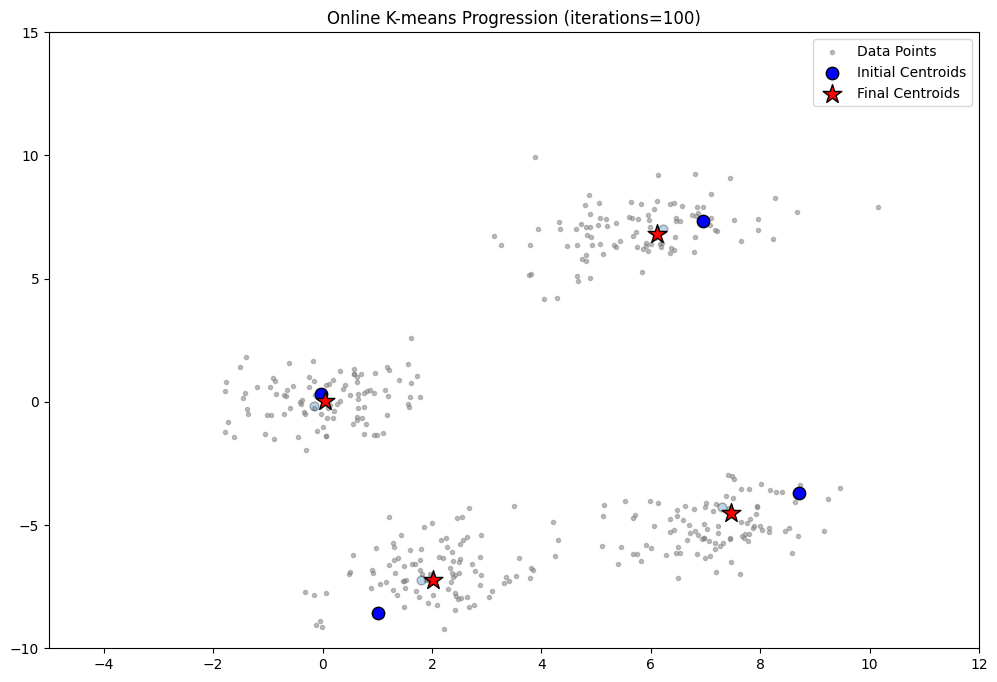

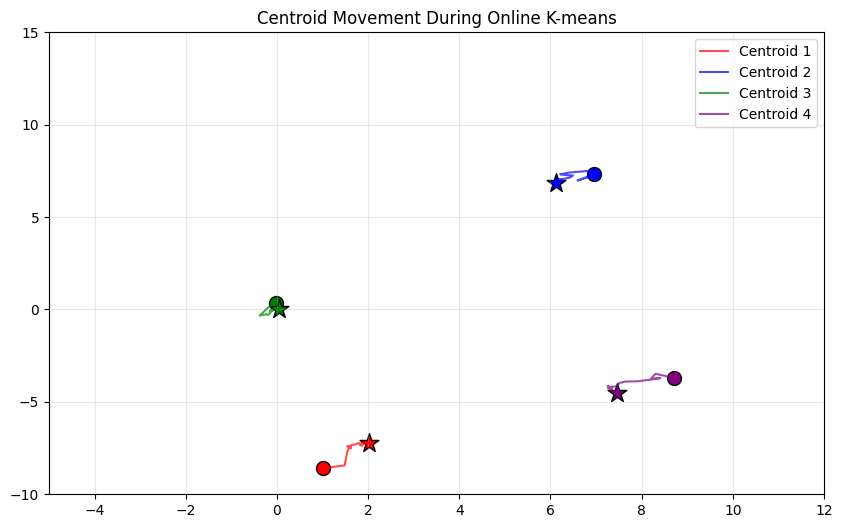

In [27]:
# Plot results
plot_online_kmeans(data, centroids_history, interval=50)

# Plot centroid movements
plot_centroids_movement(centroids_history, k)